In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv("Order1.csv")

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

PreProcessing

In [5]:
df['Date'] = pd.to_datetime(df['Date'] , dayfirst = True)

Transaction List

In [6]:
transaction = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [7]:
#encode using encoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)

In [8]:
transaction_df = pd.DataFrame(te_ary , columns = te.columns_)

In [9]:
transaction_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Train Apriori

In [10]:
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, num_itemsets = None , metric="lift" , min_threshold = 0.5)
print(rules.head())


      antecedents      consequents  antecedent support  consequent support  \
0      (UHT-milk)           (beef)            0.078502            0.119548   
1          (beef)       (UHT-milk)            0.119548            0.078502   
2  (bottled beer)       (UHT-milk)            0.158799            0.078502   
3      (UHT-milk)   (bottled beer)            0.078502            0.158799   
4      (UHT-milk)  (bottled water)            0.078502            0.213699   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010518    0.133987  1.120775               1.0  0.001133    1.016672   
1  0.010518    0.087983  1.120775               1.0  0.001133    1.010396   
2  0.014879    0.093700  1.193597               1.0  0.002413    1.016769   
3  0.014879    0.189542  1.193597               1.0  0.002413    1.037933   
4  0.021293    0.271242  1.269268               1.0  0.004517    1.078960   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.116940

In [11]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,1.0,0.001133,1.016672,0.116940,0.056088,0.016399,0.110985
1,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,1.0,0.001133,1.010396,0.122392,0.056088,0.010289,0.110985
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,1.0,0.002413,1.016769,0.192815,0.066897,0.016492,0.141621
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,1.0,0.002413,1.037933,0.176014,0.066897,0.036547,0.141621
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,1.0,0.004517,1.078960,0.230217,0.078598,0.073181,0.185441


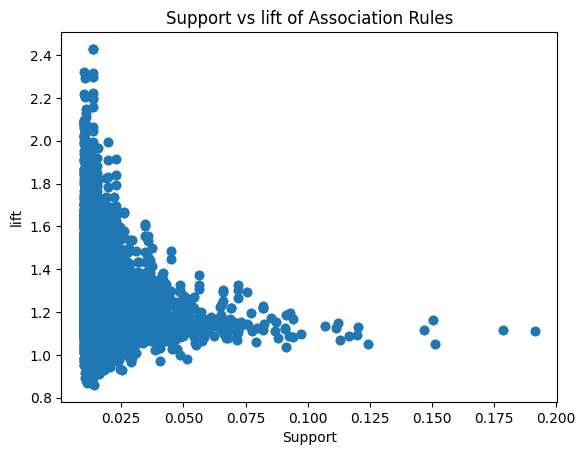

In [12]:

plt.scatter(rules['support'], rules['lift'])
plt.xlabel('Support')
plt.ylabel('lift')
plt.title('Support vs lift of Association Rules')
plt.show()

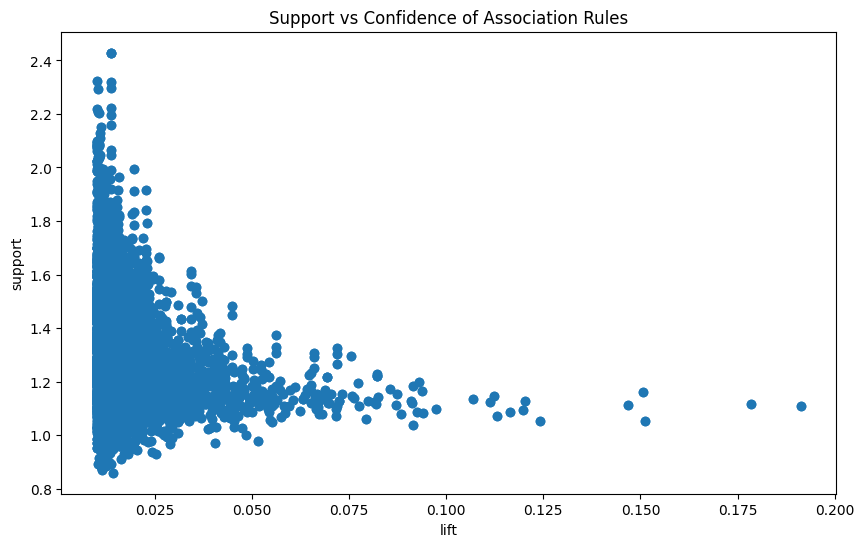

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('lift')
plt.ylabel('support')
plt.title('Support vs Confidence of Association Rules')
plt.show()